<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import string
from geopy.geocoders import Nominatim
from nltk.corpus import stopwords


In [2]:
df= pd.read_csv('survey_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [4]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [5]:
column_mapping = {
    'q1': 'Age',
    'q2': 'Industry',
    'q3': 'Job_Title',
    'q4': 'Job_Description',
    'q5': 'Salary',
    'q6': 'Monetary_compensation',
    'q7': 'Currency',
    'q8': 'Other_Currency',
    'q9': 'Other_income',
    'q10': 'Country',
    'q11': 'State',
    'q12': 'Location',
    'q13': 'Overall_experience',
    'q14':'Related_experience',
    'q15':'Degree',
    'q16':'Sex',
    'q17': 'Ethnicity'
}
df.rename(columns=column_mapping, inplace=True)

In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              28108 non-null  object 
 1   Age                    28108 non-null  object 
 2   Industry               28033 non-null  object 
 3   Job_Title              28107 non-null  object 
 4   Job_Description        7273 non-null   object 
 5   Salary                 28108 non-null  object 
 6   Monetary_compensation  20793 non-null  float64
 7   Currency               28108 non-null  object 
 8   Other_Currency         211 non-null    object 
 9   Other_income           3047 non-null   object 
 10  Country                28108 non-null  object 
 11  State                  23074 non-null  object 
 12  Location               28026 non-null  object 
 13  Overall_experience     28108 non-null  object 
 14  Related_experience     28108 non-null  object 
 15  De

In [7]:
df.shape

(28108, 18)

In [8]:
df.describe()

,Monetary_compensation
count,2.079300e+04
mean,1.824460e+04
std,8.336249e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [9]:

missing_percent = df.isnull().mean() * 100
missing_percent



timestamp                 0.000000
Age                       0.000000
Industry                  0.266828
Job_Title                 0.003558
Job_Description          74.124804
Salary                    0.000000
Monetary_compensation    26.024619
Currency                  0.000000
Other_Currency           99.249324
Other_income             89.159670
Country                   0.000000
State                    17.909492
Location                  0.291732
Overall_experience        0.000000
Related_experience        0.000000
Degree                    0.793368
Sex                       0.608368
Ethnicity                 0.629714
dtype: float64

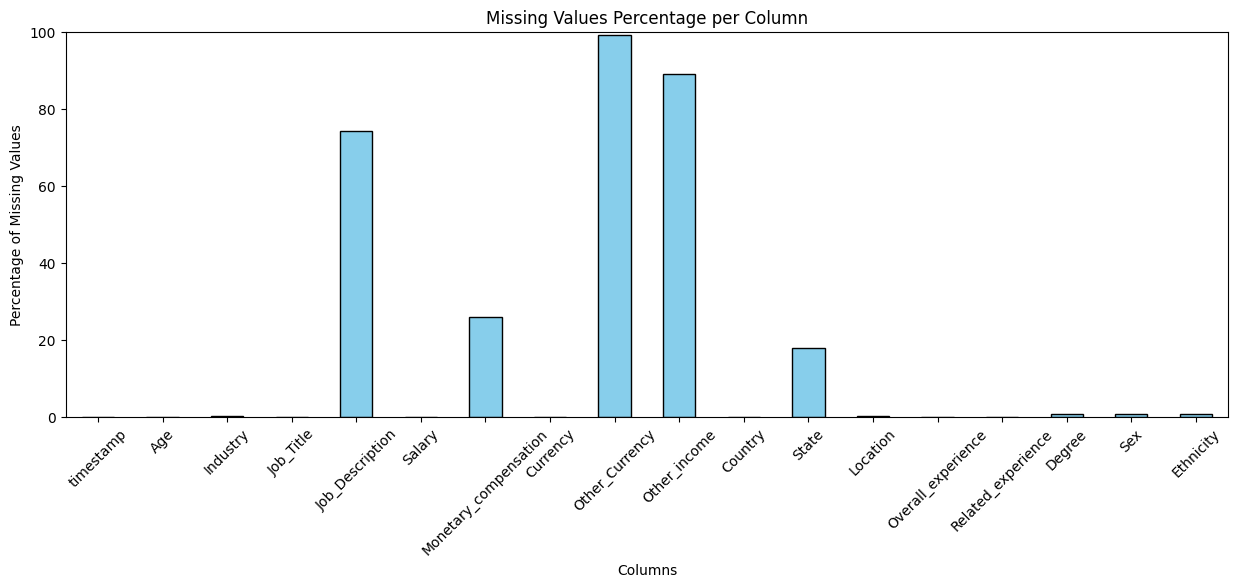

In [10]:
# Plot
plt.figure(figsize=(15, 5))
missing_percent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Ensure consistent scaling
plt.show()

In [11]:
cols = df.columns
for col in cols:
    print(f"Column {col} has {df[col].unique().shape[0]} unique values")

Column timestamp has 25326 unique values
Column Age has 7 unique values
Column Industry has 1221 unique values
Column Job_Title has 14378 unique values
Column Job_Description has 7011 unique values
Column Salary has 4319 unique values
Column Monetary_compensation has 849 unique values
Column Currency has 11 unique values
Column Other_Currency has 125 unique values
Column Other_income has 2984 unique values
Column Country has 382 unique values
Column State has 138 unique values
Column Location has 4842 unique values
Column Overall_experience has 8 unique values
Column Related_experience has 8 unique values
Column Degree has 7 unique values
Column Sex has 6 unique values
Column Ethnicity has 52 unique values


In [12]:
print("Unique values per column with less than 20 unique values")
for col in cols:
    if df[col].unique().shape[0] <20:
        print(df[col].value_counts(dropna=False))
        print("==========================")
    

Unique values per column with less than 20 unique values
Age
25-34         12668
35-44          9908
45-54          3193
18-24          1236
55-64           994
65 or over       95
under 18         14
Name: count, dtype: int64
Currency
USD        23410
CAD         1675
GBP         1592
EUR          646
AUD/NZD      504
Other        164
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64
Overall_experience
11 - 20 years       9630
8 - 10 years        5381
5-7 years           4886
21 - 30 years       3645
2 - 4 years         3038
31 - 40 years        870
1 year or less       533
41 years or more     125
Name: count, dtype: int64
Related_experience
11 - 20 years       6542
5-7 years           6524
2 - 4 years         6263
8 - 10 years        4984
21 - 30 years       1870
1 year or less      1500
31 - 40 years        384
41 years or more      41
Name: count, dtype: int64
Degree
College degree                        13536
Master's d

In [13]:
for col in cols:
    print(f"column {col} mode value is {df[col].mode().values[0] if not df[col].mode().empty else np.nan} with frequency {df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 0}")

column timestamp mode value is 4/27/2021 11:05:08 with frequency 5
column Age mode value is 25-34 with frequency 12668
column Industry mode value is Computing or Tech with frequency 4711
column Job_Title mode value is Software Engineer with frequency 286
column Job_Description mode value is Fundraising with frequency 20
column Salary mode value is 60,000 with frequency 430
column Monetary_compensation mode value is 0.0 with frequency 7956
column Currency mode value is USD with frequency 23410
column Other_Currency mode value is INR with frequency 11
column Other_income mode value is Hourly with frequency 4
column Country mode value is United States with frequency 9004
column State mode value is California with frequency 2611
column Location mode value is Boston with frequency 772
column Overall_experience mode value is 11 - 20 years with frequency 9630
column Related_experience mode value is 11 - 20 years with frequency 6542
column Degree mode value is College degree with frequency 135

In [14]:
# Outlier Detection using IQR
Q1 = df["Monetary_compensation"].quantile(0.25)
Q3 = df["Monetary_compensation"].quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((df["Monetary_compensation"] < (Q1 - 1.5 * IQR)) | (df["Monetary_compensation"] > (Q3 + 1.5 * IQR))).sum()
outlier_count



1986

In [15]:
# Select the numerical column
num_col = "Monetary_compensation"

# Drop missing values to avoid errors
df_num = df[num_col].dropna()

# Convert to thousands for better readability
df_num_scaled = df_num / 1e3  

# Summary statistics
summary_stats = df_num_scaled.describe()

# Skewness 
skewness = df_num_scaled.skew()
skewness

143.41356470722576

In [16]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['timestamp', 'Age', 'Industry', 'Job_Title', 'Job_Description',
       'Salary', 'Currency', 'Other_Currency', 'Other_income', 'Country',
       'State', 'Location', 'Overall_experience', 'Related_experience',
       'Degree', 'Sex', 'Ethnicity'],
      dtype='object')

In [17]:
df

,timestamp,Age,Industry,Job_Title,Job_Description,Salary,Monetary_compensation,Currency,Other_Currency,Other_income,Country,State,Location,Overall_experience,Related_experience,Degree,Sex,Ethnicity
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28103,12/29/2024 23:50:26,25-34,Entertainment,Junior Editor,NaN,72800,NaN,USD,NaN,NaN,United States,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White"
28104,1/3/2025 16:03:10,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,USD,NaN,NaN,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Woman,White
28105,1/16/2025 10:00:47,35-44,Entertainment,Product communication and education specialist,NaN,1000000,NaN,Other,Czk,NaN,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White
28106,1/23/2025 19:38:04,35-44,Nonprofits,Director of content design,NaN,132000,NaN,USD,NaN,NaN,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White


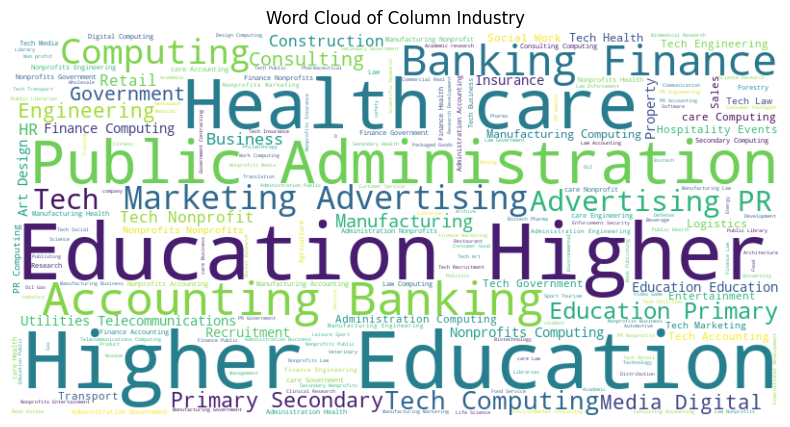

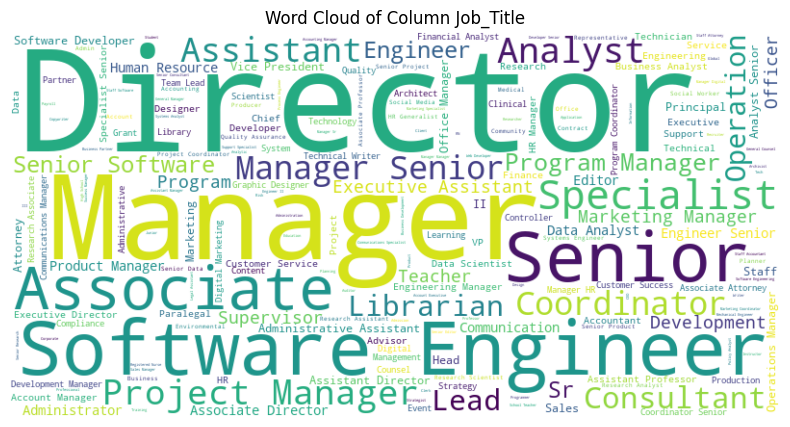

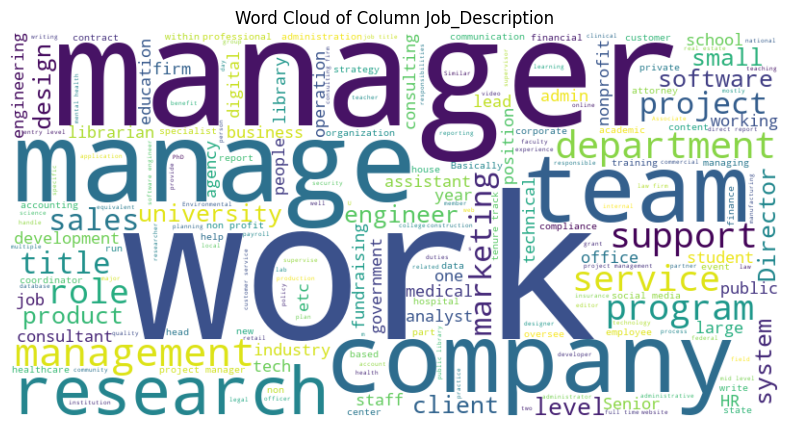

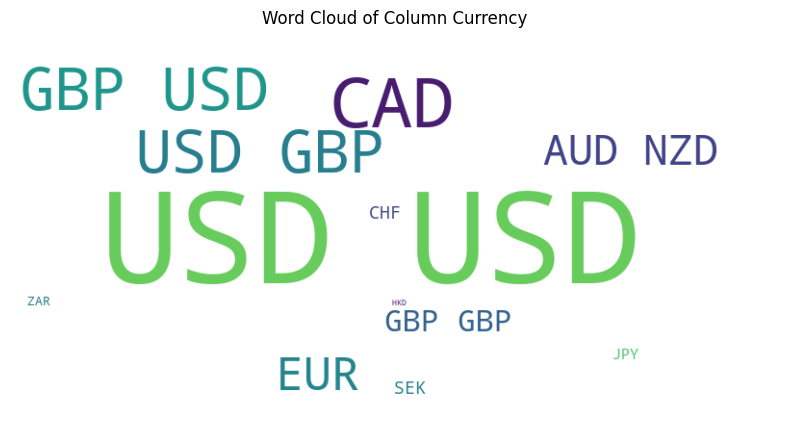

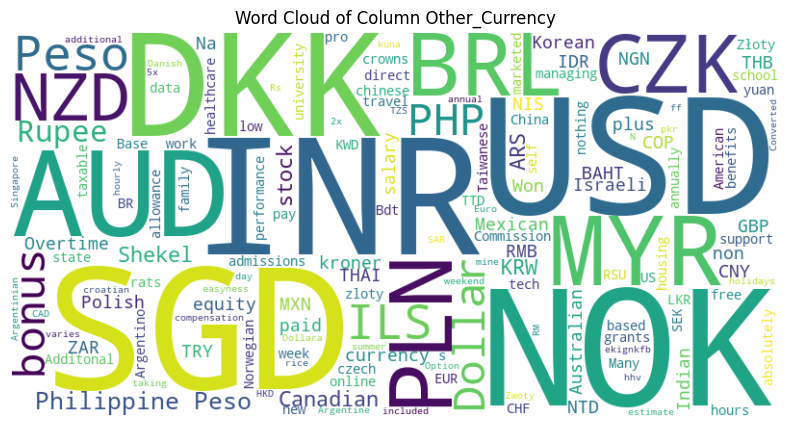

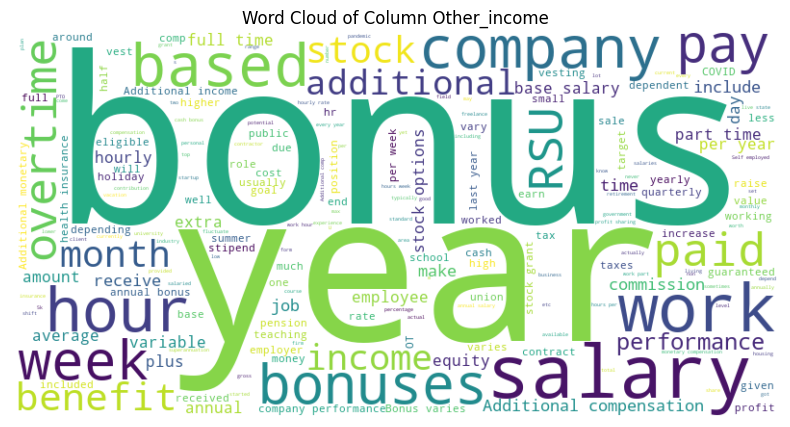

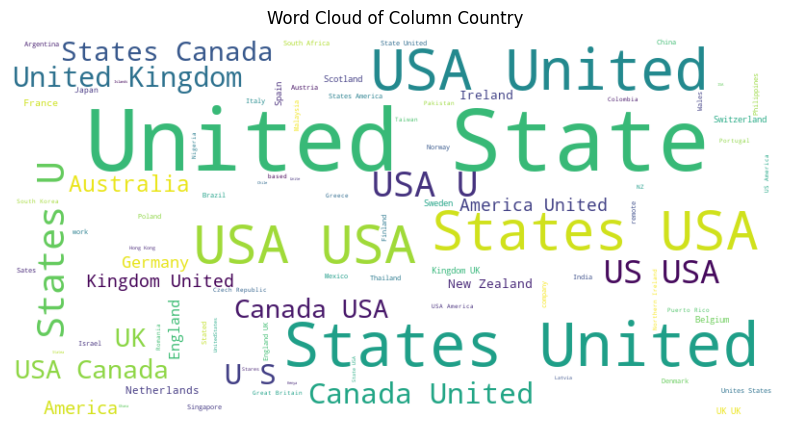

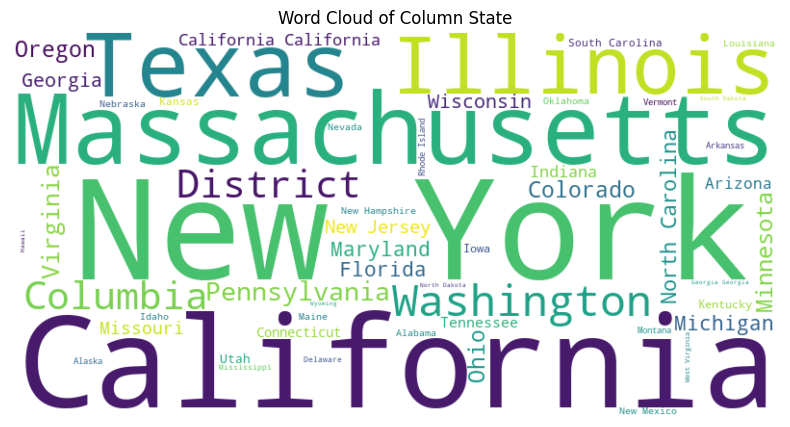

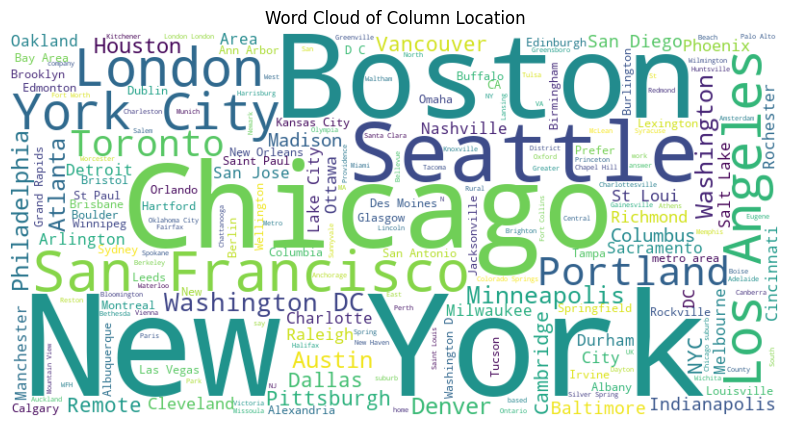

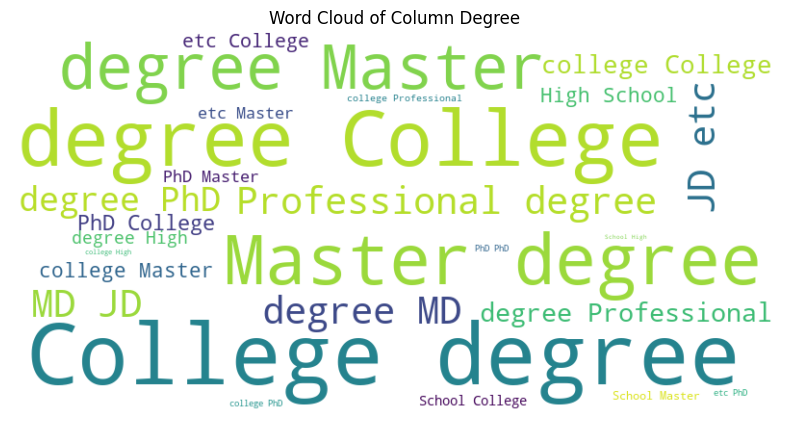

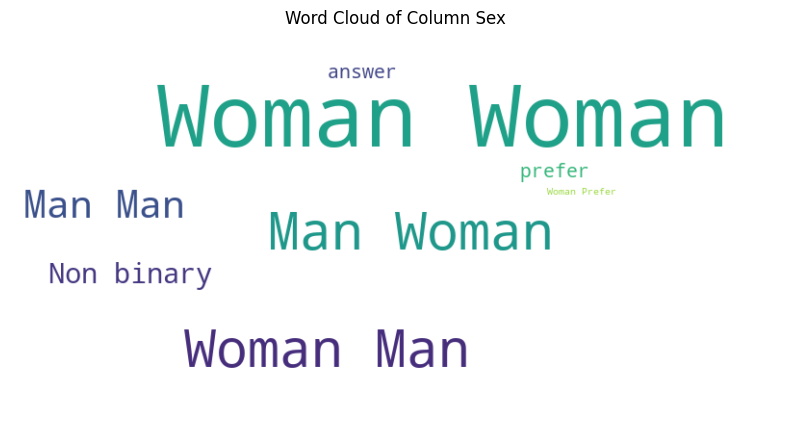

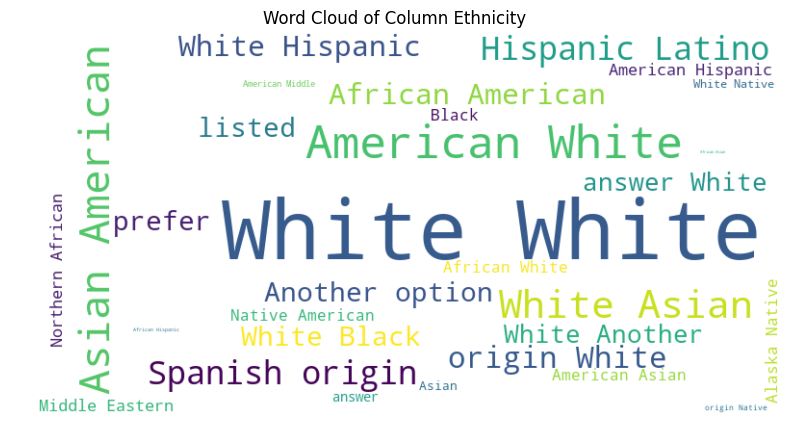

In [18]:
cat_col = ['Industry', 'Job_Title', 'Job_Description', 'Currency',
       'Other_Currency', 'Other_income', 'Country', 'State', 'Location','Degree', 'Sex',
       'Ethnicity']
def plot_wordcloud(text_data):
    text = " ".join(text_data.dropna())  # Combine all text
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud of Column {col}")
    plt.show()

for col in cat_col:
    
    plot_wordcloud(df[col])

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


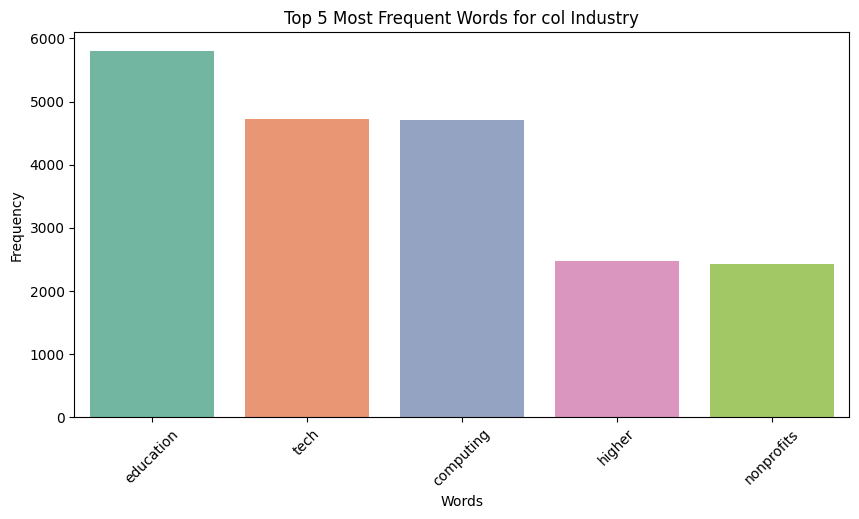

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


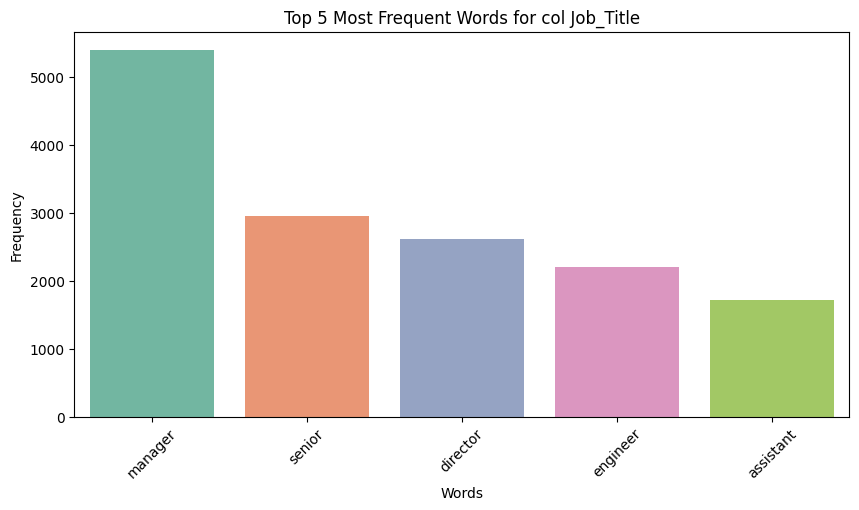

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


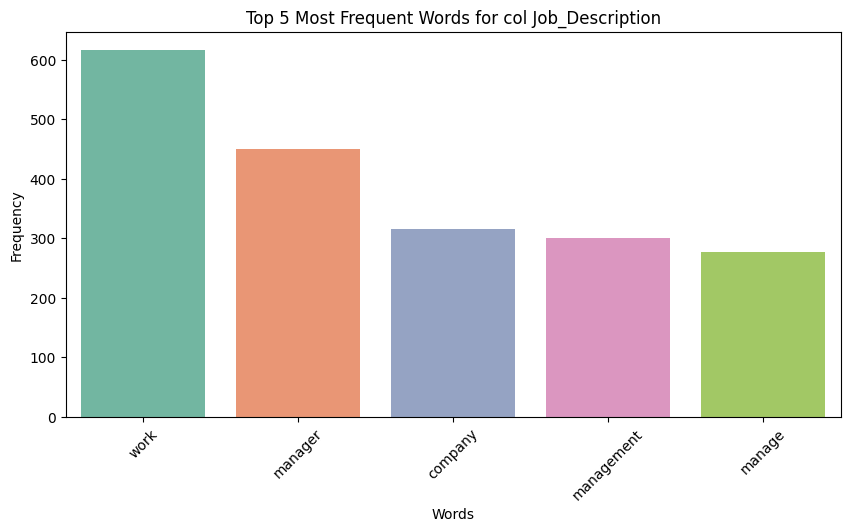

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


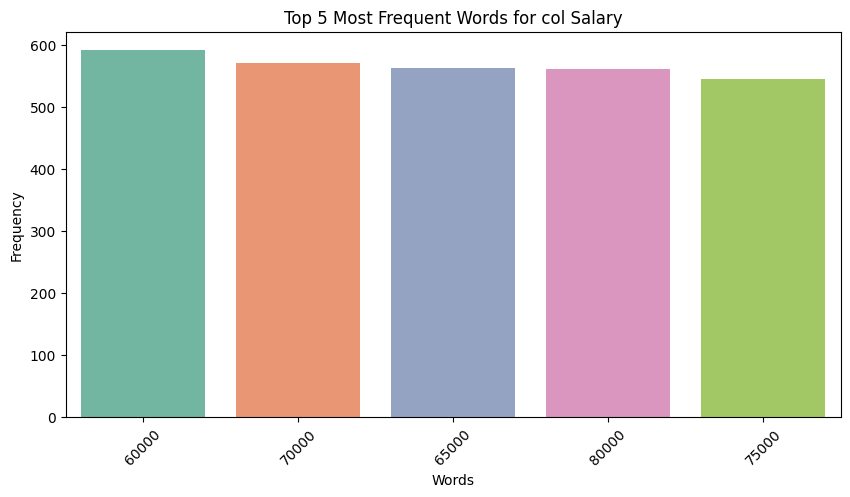

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


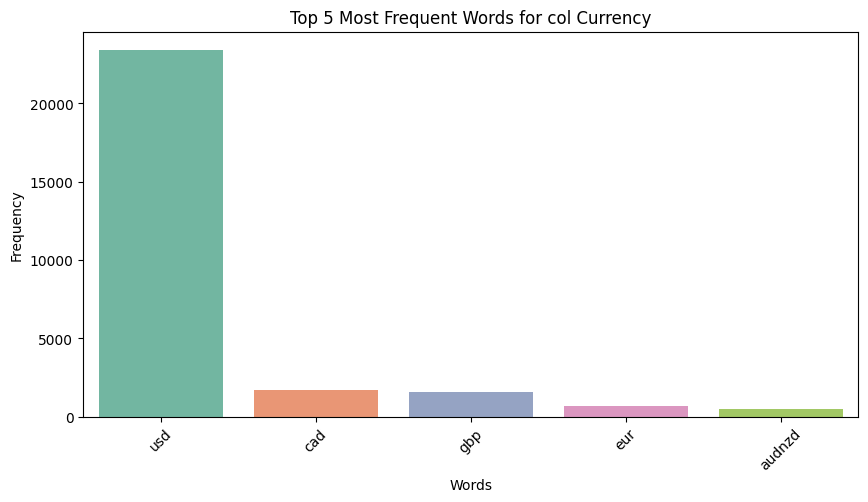

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


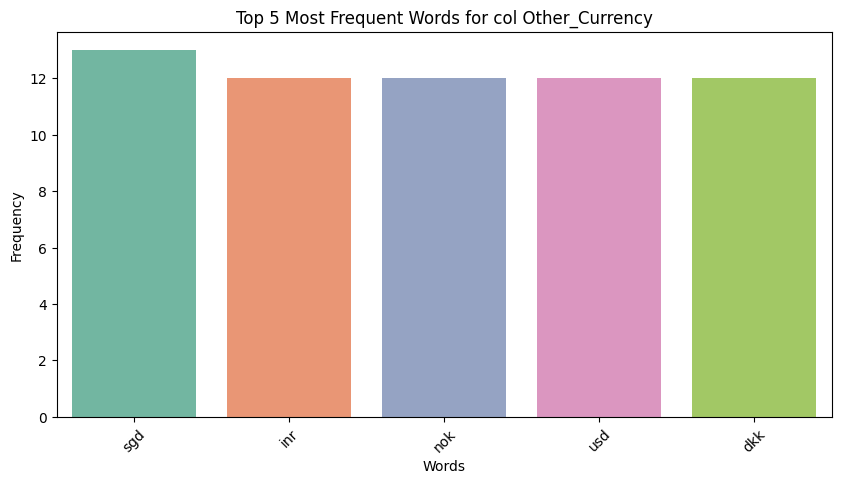

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


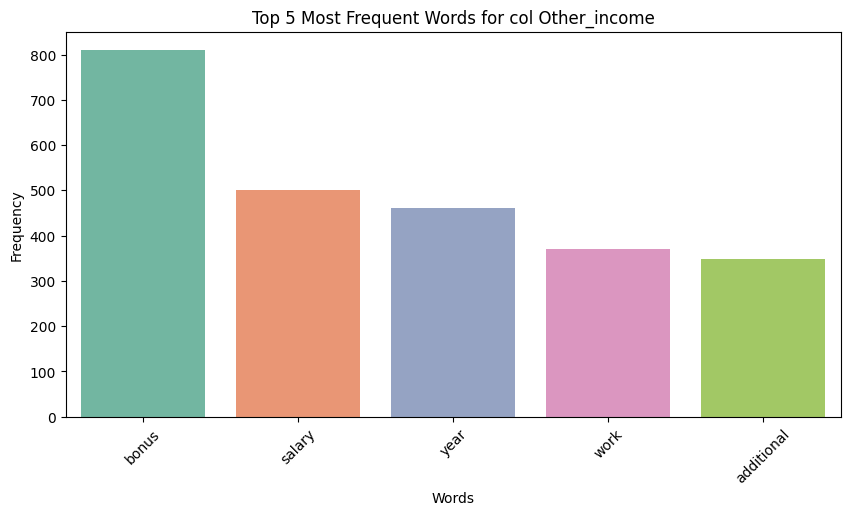

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


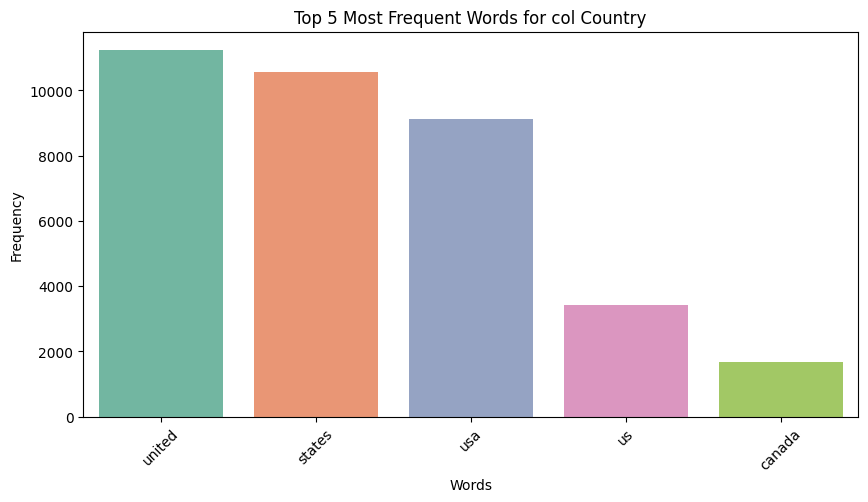

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


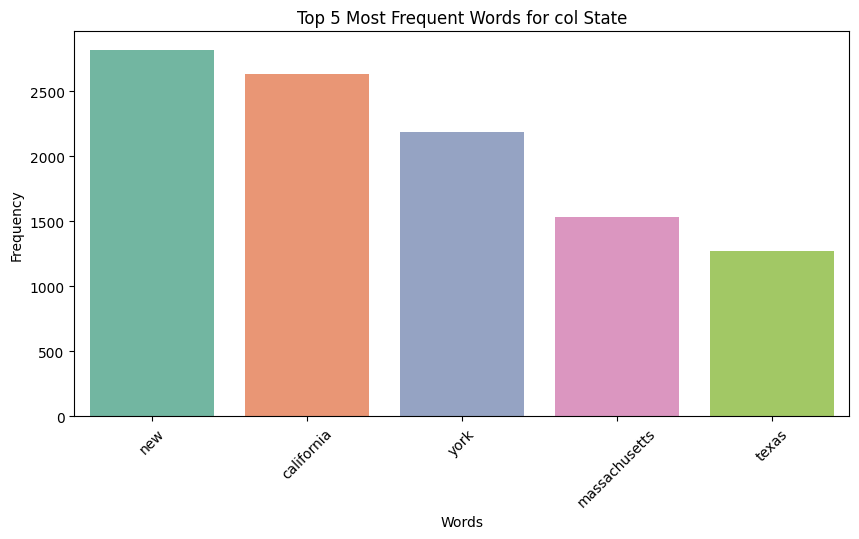

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


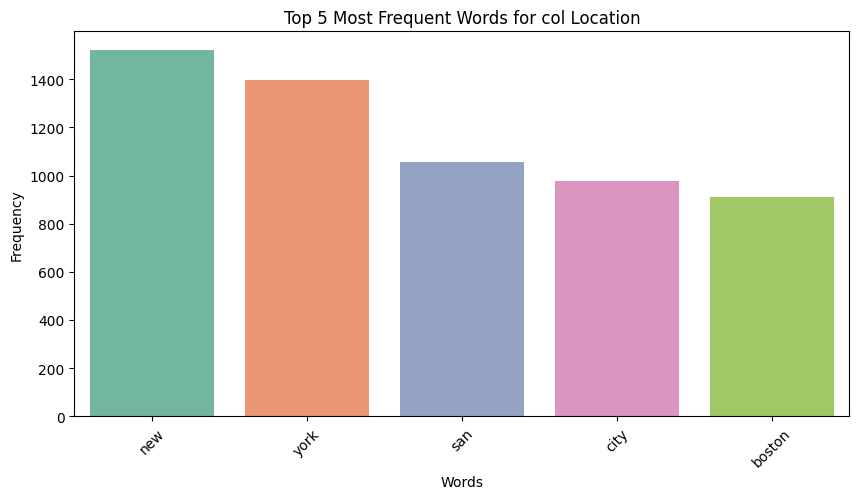

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


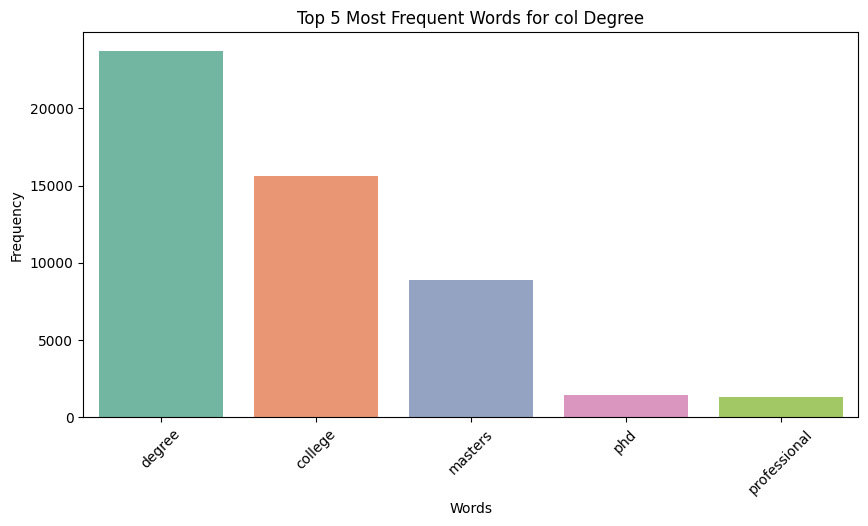

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


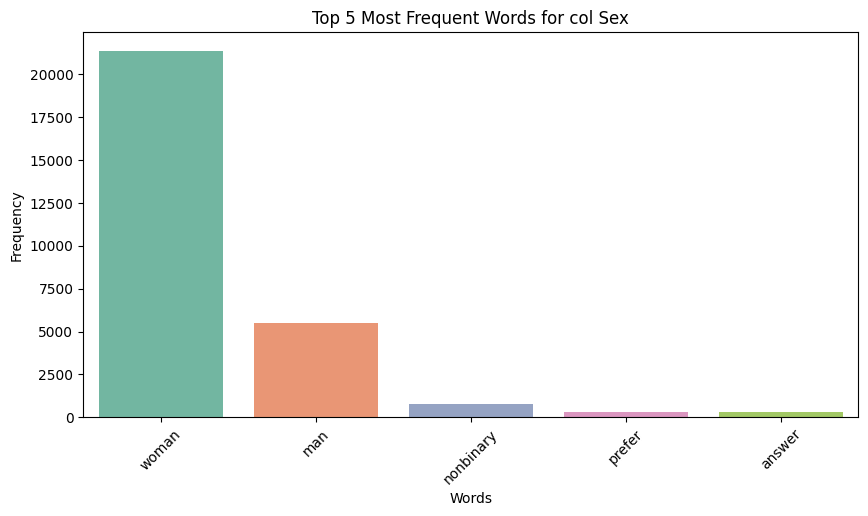

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2492780370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")


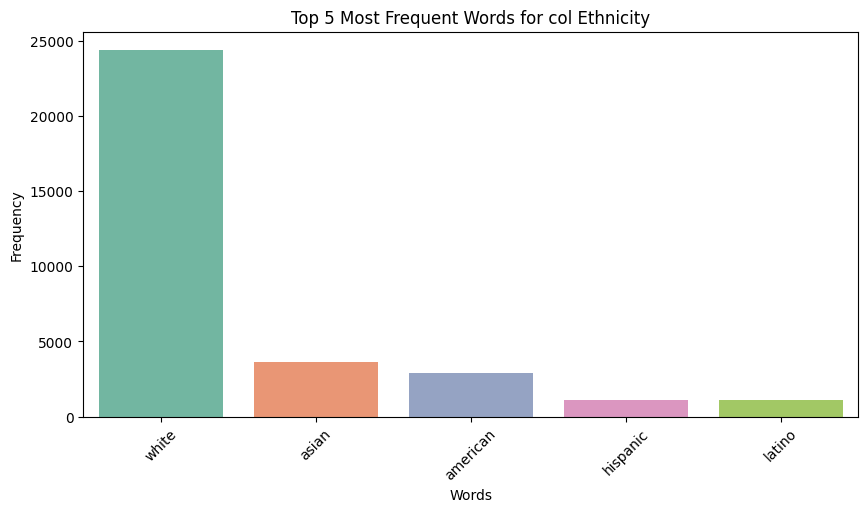

In [19]:




def plot_top_words(text_data,col, top_n=10):
    text = " ".join(text_data.dropna()).lower()
    words = text.translate(str.maketrans("", "", string.punctuation)).split()
    words = [word for word in words if word not in stopwords.words("english")]
    
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=[w[0] for w in top_words], y=[w[1] for w in top_words], palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} Most Frequent Words for col {col}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

for col in categorical_cols:
    if df[col].dtype == "object":
        if col == 'timestamp' or col == 'Age' or col == 'Overall_experience' or col == 'Related_experience':
            pass
        else:
            plot_top_words(df[col],col, top_n=5)
        

**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

[Add you answer to this markdown cell]

I loaded the data and renamed the column for easy assessment. Then, I tried to find the basic information on the dataset. I found out of total 8 columns 1 was numeric and the numeric column is Monetary_compensation(q6). There are total 28108 entries in the dataset. As the Monetary_compensation column was numeric I tried to find mean, std_deviation, min , max ,etc for it. Then, I also noticed lots of data were missing in many columns. I found out that Other_Currency, Other_income and Job_description column had the most missing value around 74% - 99%. Some other column like Monetary_compensation and State had missing value % of around 17-26%. Other columns had minimal missing values. I find the count of unique values in all column with max unique value of 25326 in timestamp column and least unique value of 6 in sex column. I found there were 6 column with less than 20 unique values and they were Age, Currency, Overall_experience, Related_experience, Degree and Sex. I also found the mode values of each column with their respective frequency. For the Monetary_compensation column I tried to find the outlier count and their were 1986 outliers in those column. I plotted the Word Cloud for all the column with text / categorical value. The word cloud visualization can help to find the common words in each filed for example in Industry column “Higher Education”, “Health care”, “Accounting”,”Banking”,etc are common words. Similar for other columns as well. I plotted the 5 most frequent words in each categorical column. For Industry column “education” “tech”, “computing”, “higher” and “nonprofits” were top frequent words. For Job_Title “ manager”, “senior”, “director”,”engineer” and “assistant” are the one. Similar goes for all the column. The skewness value for Monetary_compesation column is 143.41356470722576 which is highly positive skewed distribution. Column Country have lots of data having same meaning with different text like "USA", "United States", "US", etc all of these text refer to United States of America.

In [20]:
df

,timestamp,Age,Industry,Job_Title,Job_Description,Salary,Monetary_compensation,Currency,Other_Currency,Other_income,Country,State,Location,Overall_experience,Related_experience,Degree,Sex,Ethnicity
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28103,12/29/2024 23:50:26,25-34,Entertainment,Junior Editor,NaN,72800,NaN,USD,NaN,NaN,United States,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White"
28104,1/3/2025 16:03:10,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,USD,NaN,NaN,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Woman,White
28105,1/16/2025 10:00:47,35-44,Entertainment,Product communication and education specialist,NaN,1000000,NaN,Other,Czk,NaN,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White
28106,1/23/2025 19:38:04,35-44,Nonprofits,Director of content design,NaN,132000,NaN,USD,NaN,NaN,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White


#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

[Add you answer to this markdown cell]

**Note: As I have renamed the column for easy assessment and easy interpretation I will be using their name.**

Job_Description, Other_Currency and Other_income have significantly large number of missing values so, it is really difficult for us to fill those missing values. If we filled those data incorrectly we can generate  a biased dataset which will deviate from our goal. These 3 columns have more than 75% of missing values. These columns are not as important as well because they are not the mandatory field in the form. Considering that perspective, I think these are not quite important feature so, we will have to drop these features from the dataset. 

The another columns that have significantly  high missing values are Monetary_compensation(26%) and State(17%). And other columns have realtively low missing values. I think Monetary_compensation and State  are important feature in data set and eliminating those features will really be a significant loss in important data. Hence, we will try to fill missing values  those features.For the Monetary_compensation feature we know from our state of data that this column is highly positively skewed in distribution. It will be good enough if we fill the missing data with median value. 

To impute the "State" feature we can use the data from the "Location" feature and map the related state in the missing value within State column.  

For the "State" data we will take the reference from the "Location" data to fill  the "State" data.  I think segmenting the dataset into location based data to fill the  missing data in State feature will really be helpful and effective.

From the state of data there were 1986 outlier in Monetary_compensation which significantly low in % so, I think  oulier won’t be much of a problem to us in this dataset.

We will also try to standardize the value "Country" column like "USA", "US", "United States" can be mapped to standard form  "United States of America".


#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [21]:
clean_df = df.copy()

In [22]:
clean_df = clean_df.drop(['Job_Description', 'Other_Currency', 'Other_income'], axis=1)

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              28108 non-null  object 
 1   Age                    28108 non-null  object 
 2   Industry               28033 non-null  object 
 3   Job_Title              28107 non-null  object 
 4   Salary                 28108 non-null  object 
 5   Monetary_compensation  20793 non-null  float64
 6   Currency               28108 non-null  object 
 7   Country                28108 non-null  object 
 8   State                  23074 non-null  object 
 9   Location               28026 non-null  object 
 10  Overall_experience     28108 non-null  object 
 11  Related_experience     28108 non-null  object 
 12  Degree                 27885 non-null  object 
 13  Sex                    27937 non-null  object 
 14  Ethnicity              27931 non-null  object 
dtypes:

In [24]:
median = clean_df['Monetary_compensation'].median()
median

2000.0

In [25]:
median = clean_df['Monetary_compensation'].median()
#clean_df['Monetary_compensation'].replace(0,median, inplace=True)
clean_df['Monetary_compensation'].fillna(median, inplace=True)
print(f"Missing values in Monetary_compensation after imputation: {clean_df['Monetary_compensation'].isnull().sum()}")

Missing values in Monetary_compensation after imputation: 0


In [26]:
clean_df

,timestamp,Age,Industry,Job_Title,Salary,Monetary_compensation,Currency,Country,State,Location,Overall_experience,Related_experience,Degree,Sex,Ethnicity
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",2000.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28103,12/29/2024 23:50:26,25-34,Entertainment,Junior Editor,72800,2000.0,USD,United States,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White"
28104,1/3/2025 16:03:10,18-24,Engineering or Manufacturing,Applications Engineer,100000,21000.0,USD,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Woman,White
28105,1/16/2025 10:00:47,35-44,Entertainment,Product communication and education specialist,1000000,2000.0,Other,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White
28106,1/23/2025 19:38:04,35-44,Nonprofits,Director of content design,132000,2000.0,USD,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White


In [27]:
clean_df[['Monetary_compensation']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Monetary_compensation  28108 non-null  float64
dtypes: float64(1)
memory usage: 219.7 KB


In [28]:
location_df = clean_df[['Location','State']]
location_df

,Location,State
0,Boston,Massachusetts
1,Cambridge,NaN
2,Chattanooga,Tennessee
3,Milwaukee,Wisconsin
4,Greenville,South Carolina
...,...,...
28103,Los Angeles,California
28104,Dallas,Texas
28105,Prague,NaN
28106,Kansas City,Missouri


In [29]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  28026 non-null  object
 1   State     23074 non-null  object
dtypes: object(2)
memory usage: 439.3+ KB


In [30]:
#pd.set_option('display.max_rows', None)

location_df_with_null_state = location_df[location_df['State'].isnull()]
location_df_with_null_state
location_df_with_null_state['Location'].value_counts()

#location_df['Location'].value_counts()

Location
London              575
Toronto             415
Vancouver           184
Ottawa              135
Melbourne            84
                   ... 
Hanoi                 1
India                 1
New Westminster       1
 Byron Bay            1
Suffolk               1
Name: count, Length: 1269, dtype: int64

In [31]:

city_to_state = {
    "London": "England",
    "Toronto": "Ontario",
    "Vancouver": "British Columbia",
    "Ottawa": "Ontario",
    "Melbourne": "Victoria",
    "Sydney": "New South Wales",
    "Montreal": "Quebec",
    "Calgary": "Alberta",
    "Dublin": "Leinster",
    "Edmonton": "Alberta",
    "Edinburgh": "Scotland",
    "Manchester": "England",
    "Glasgow": "Scotland",
    "Berlin": "Berlin",
    "Winnipeg": "Manitoba",
    "Leeds": "England",
    "Brisbane": "Queensland",
    "Halifax": "Nova Scotia",
    "Auckland": "Auckland",
    "Bristol": "England",
    "Wellington": "Wellington",
    "Paris": "Île-de-France",
    "Cambridge": "England",
    "Amsterdam": "North Holland",
    "Perth": "Western Australia",
    "Birmingham": "England",
    "Oxford": "England",
    "Munich": "Bavaria",
    "Adelaide": "South Australia",
    "Victoria": "British Columbia",
    "Canberra": "Australian Capital Territory",
    "Remote": "N/A",
    "Nottingham": "England",
    "Tokyo": "Tokyo",
    "Barcelona": "Catalonia",
    "Brussels": "Brussels",
    "Brighton": "England",
    "Singapore": "Singapore",
    "Stockholm": "Stockholm",
    "Kitchener": "Ontario",
    "Regina": "Saskatchewan",
    "Sheffield": "England",
    "Vienna": "Vienna",
    "Hamburg": "Hamburg",
    "Saskatoon": "Saskatchewan",
    "Waterloo": "Ontario",
    "Vancouver, BC": "British Columbia",
    "Belfast": "Northern Ireland",
    "Cardiff": "Wales",
    "York": "England",
    "Christchurch": "Canterbury",
    "Hamilton": "Ontario",
    "Liverpool": "England",
    "Reading": "England",
    "Cork": "Munster",
    "Oslo": "Oslo",
    "Aberdeen": "Scotland",
    "Utrecht": "Utrecht"
}



In [32]:
# Replacing null state values with the state name from the city_to_state dictionary
location_df['State'] = location_df.apply(
    lambda row: city_to_state.get(row['Location'], row['State']) if pd.isnull(row['State']) else row['State'],
    axis=1
)

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\982719620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['State'] = location_df.apply(


In [33]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  28026 non-null  object
 1   State     26027 non-null  object
dtypes: object(2)
memory usage: 439.3+ KB


In [34]:
clean_df['State'] = location_df['State']

In [35]:
missing_percent = clean_df.isnull().mean() * 100
missing_percent

timestamp                0.000000
Age                      0.000000
Industry                 0.266828
Job_Title                0.003558
Salary                   0.000000
Monetary_compensation    0.000000
Currency                 0.000000
Country                  0.000000
State                    7.403586
Location                 0.291732
Overall_experience       0.000000
Related_experience       0.000000
Degree                   0.793368
Sex                      0.608368
Ethnicity                0.629714
dtype: float64

In [36]:
df_with_country = clean_df[['Country']]
df_with_country.value_counts()

Country             
United States           9004
USA                     7946
US                      2612
Canada                  1572
United States            668
                        ... 
Puerto Rico                1
Qatar                      1
Remote (philippines)       1
Russia                     1
Sri lanka                  1
Name: count, Length: 382, dtype: int64

In [37]:
country_mapping = {
    'United States': 'United States',
    'USA': 'United States',
    'US': 'United States',
    'Canada': 'Canada',
    'U.S.': 'United States',
    'UK': 'United Kingdom',
    'United Kingdom': 'United Kingdom',
    'Usa': 'United States',
    'United States of America': 'United States',
    'Australia': 'Australia',
    'United states': 'United States',
    'usa': 'United States',
    'Germany': 'Germany',
    'England': 'United Kingdom',
    'united states': 'United States',
    'Us': 'United States',
    'Ireland': 'Ireland',
    'New Zealand': 'New Zealand',
    'Uk': 'United Kingdom',
    'France': 'France',
    'U.S.A.': 'United States',
    'Spain': 'Spain',
    'Netherlands': 'Netherlands',
    'Scotland': 'United Kingdom',
    'us': 'United States',
    'Sweden': 'Sweden',
    'Belgium': 'Belgium',
    'Switzerland': 'Switzerland',
    'canada': 'Canada',
    'Japan': 'Japan',
    'The Netherlands': 'Netherlands',
    'America': 'United States',
    'India': 'India',
    'United State': 'United States',
    'Denmark': 'Denmark',
    'Austria': 'Austria',
    'Singapore': 'Singapore',
    'Finland': 'Finland',
    'Italy': 'Italy',
    'Israel': 'Israel',
    'South Africa': 'South Africa',
    'Unites States': 'United States',
    'Norway': 'Norway',
    'Malaysia': 'Malaysia',
    'Brazil': 'Brazil'
}


In [38]:
df_with_country.columns

Index(['Country'], dtype='object')

In [39]:
#df_with_country['Country'] = df_with_country['Country'].map(country_mapping)
df_with_country['Country'] = df_with_country['Country'].map(country_mapping).fillna(df_with_country['Country'])

C:\Users\chandan\AppData\Local\Temp\ipykernel_6472\2972638999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_country['Country'] = df_with_country['Country'].map(country_mapping).fillna(df_with_country['Country'])


In [40]:
clean_df['Country'] = df_with_country['Country']
clean_df.head(20)

,timestamp,Age,Industry,Job_Title,Salary,Monetary_compensation,Currency,Country,State,Location,Overall_experience,Related_experience,Degree,Sex,Ethnicity
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,England,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",2000.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",2000.0,USD,United States,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,"33,000",2000.0,USD,United States,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"50,000",2000.0,USD,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,"112,000",10000.0,USD,United States,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,"45,000",0.0,USD,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


In [41]:
clean_df['State'] = clean_df['State'].fillna('Unknown')
missing_percent = clean_df.isnull().mean() * 100
missing_percent

timestamp                0.000000
Age                      0.000000
Industry                 0.266828
Job_Title                0.003558
Salary                   0.000000
Monetary_compensation    0.000000
Currency                 0.000000
Country                  0.000000
State                    0.000000
Location                 0.291732
Overall_experience       0.000000
Related_experience       0.000000
Degree                   0.793368
Sex                      0.608368
Ethnicity                0.629714
dtype: float64

In [42]:
clean_df = clean_df.dropna()

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27497 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              27497 non-null  object 
 1   Age                    27497 non-null  object 
 2   Industry               27497 non-null  object 
 3   Job_Title              27497 non-null  object 
 4   Salary                 27497 non-null  object 
 5   Monetary_compensation  27497 non-null  float64
 6   Currency               27497 non-null  object 
 7   Country                27497 non-null  object 
 8   State                  27497 non-null  object 
 9   Location               27497 non-null  object 
 10  Overall_experience     27497 non-null  object 
 11  Related_experience     27497 non-null  object 
 12  Degree                 27497 non-null  object 
 13  Sex                    27497 non-null  object 
 14  Ethnicity              27497 non-null  object 
dtypes: floa

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

The biggest issues I have encountered in the messy dataset is it is easier to handle numeric data really difficult to handle, interpret and clean textual / categorical data. I am less unknown to eda visualiztion for textual data. So, it became really hard for me to perform eda on those categorical data. One of the most toughest cleaning process was while trying to impute the "State" column. I planned to map the missing State with the help of Location column as it had the city included and in the dataset I had found that people had mentioned the location of city within the respective state. So, with the Location data we could easily find out the state. But the problem was there were lots of unique city. Trying to create mapping for each and every city to state was nearly hard so, I found a solution in which I found the top unique value counts that were frequently occuring in the dataset and created the mapping for the frequent city. After mapping with missing state the null value % decreased from 26% to around 7% which was quite an improvement. I couldn't create mapping for each Location so, I filled the others with "unknown" value in missing State. The other difficulty I found was while normalizing the "Country" column. Other than that the process was time consuming but not so difficult.

Cleaning the dataset significantly improves its usability for machine learning by ensuring data quality, consistency, and reliability. Handling missing values, removing duplicates, and correcting errors prevent misleading patterns that could negatively impact model performance. When a dataset contains null values, many machine learning algorithms struggle to process them, leading to biased or inaccurate predictions. By dropping or imputing missing values, we ensure that the dataset is complete and meaningful, making the model training process more efficient and robust. Additionally, cleaning the dataset helps standardize data formats, remove irrelevant features, and address outliers, ultimately enhancing model interpretability and generalization.

Training a model on a messy dataset can lead to poor performance due to inconsistencies and noise. Missing values may cause algorithms to make incorrect assumptions, and outliers can skew model parameters, leading to biased predictions. Moreover, duplicate or irrelevant data can introduce redundancy, increasing computation time without adding valuable information. In contrast, a cleaned dataset allows the model to learn genuine patterns, improving accuracy, efficiency, and generalizability. A well-prepared dataset ensures that the model produces reliable predictions, performs well on unseen data, and avoids overfitting to noise or errors. Thus, data cleaning is a crucial preprocessing step for building high-quality machine learning models.

My goal in cleaning the dataset was to address skewness and inconsistencies, not to introduce new biases. If I had created a new bias while removing another, the entire purpose of cleaning would have been lost. However, I believe I have refined the dataset into a much cleaner and more reliable version than if I had used it in its raw form. By carefully handling missing values and inconsistencies, I have improved its overall quality, making it more suitable for machine learning. This ensures that any model trained on the dataset learns meaningful patterns rather than being misled by noise or errors. In the end, my cleaned dataset provides a stronger foundation for accurate predictions and better generalization, ultimately enhancing the reliability of any analysis based on it.

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 